In [10]:
import librosa
audio_path = 'audio-path'
samples = []
sr = 48000
x , sr = librosa.load("s2.wav", sr = 48000)
samples.append(librosa.load("s2.wav", sr = 48000)[0])
samples.append(librosa.load("s1.wav", sr = 48000)[0])
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

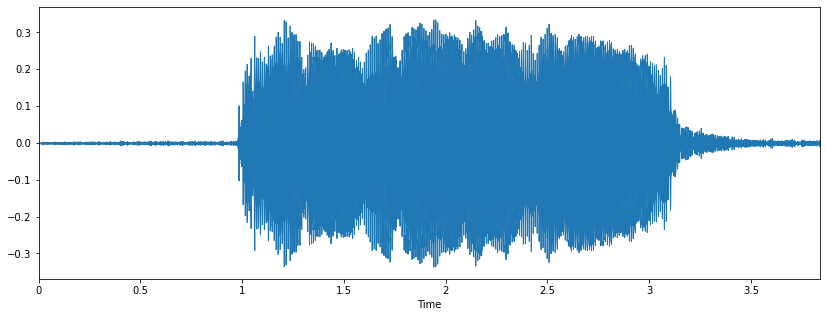

In [12]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

1025


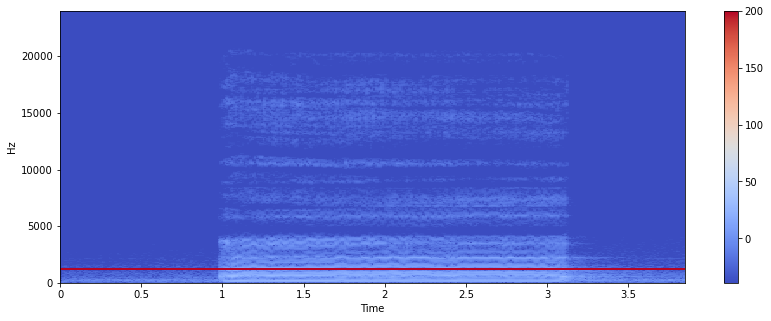

In [13]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
for i in range(50, 55):
    Xdb[i] = 200
    X[i] = 200
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
print(len(X))

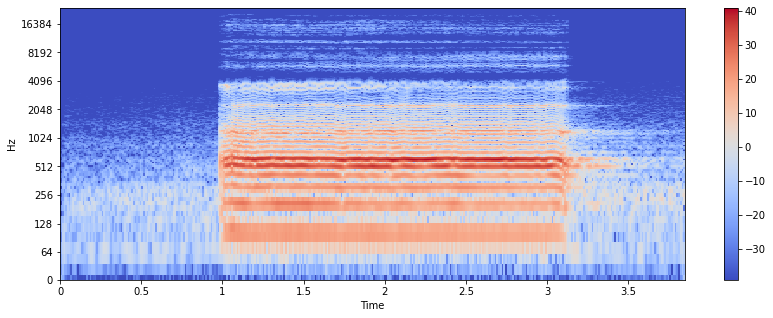

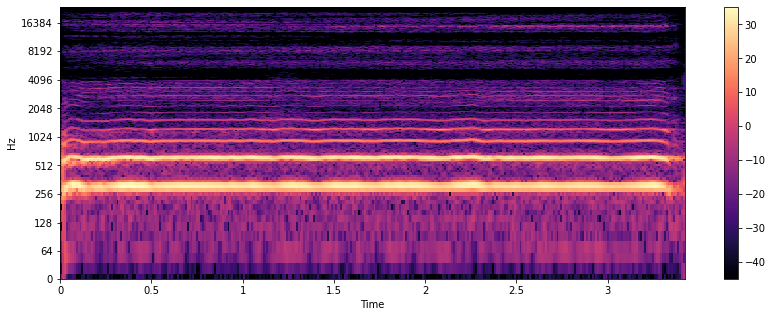

In [14]:
for x in samples:
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    #If to pring log of frequencies  
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [40]:
#spect[freq][time]
#spect[512 = nyquist frequency]
#spect[256 = nyquist freq / 2]
#freq bin = sr / n
import math
import numpy as np
from numpy.fft import fft
SR = 8000 # DON'T CHANGE
N = 1024 # DON'T CHANGE
hop = int(N/2) # DON'T CHANGE
file_path = "bass_oboe.wav"
samples, sr = librosa.load(file_path, sr = SR)

# Calculate STFT
T = math.floor( (len(samples)-N) / hop ) + 1 # the total number of frames
STFT = np.zeros((N, T), dtype='complex') # the STFT result is a N by T matrix
hann = 0.5 * ( 1 - np.cos(2*np.pi*np.arange(N)/N) ) # Hann window
for t in range(T): # for each frame
    chunck = samples[t*hop : t*hop + N] # get the frame t of audio data
    X = fft(chunck * hann) # apply FFT on windowed signal (the result contains N complex numbers)
    STFT[:, t] = X
spect = np.abs(STFT[:int(N/2), :]) # complex numbers --> abs values

print(len(spect), len(spect[5])) # 512 2070

512 2070
